Decision TREE using **Python Sklearn**

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from pprint import pprint
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Loading the dataset

In [3]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Cursos/Artificia Intelligence/Algorithms AI/Decision Tree/dataset.csv')
df

,temps,température,humidité,vent,jouer
0,ensoleilé,chaude,haute,non,non
1,ensoleilé,chaude,haute,oui,non
2,nuageux,chaude,haute,non,oui
3,pluvieux,douce,haute,non,oui
4,pluvieux,fraîche,normale,non,oui
5,pluvieux,fraîche,normale,oui,non
6,nuageux,fraîche,normale,oui,oui
7,ensoleilé,douce,haute,non,non
8,ensoleilé,fraîche,normale,non,oui
9,pluvieux,douce,normale,non,oui


In [4]:
df["joueur_desc"] =  df["jouer"]
df

,temps,température,humidité,vent,jouer,joueur_desc
0,ensoleilé,chaude,haute,non,non,non
1,ensoleilé,chaude,haute,oui,non,non
2,nuageux,chaude,haute,non,oui,oui
3,pluvieux,douce,haute,non,oui,oui
4,pluvieux,fraîche,normale,non,oui,oui
5,pluvieux,fraîche,normale,oui,non,non
6,nuageux,fraîche,normale,oui,oui,oui
7,ensoleilé,douce,haute,non,non,non
8,ensoleilé,fraîche,normale,non,oui,oui
9,pluvieux,douce,normale,non,oui,oui


Let's create some methods to manipule our data to:



1.   Create the model for DecisionTree;
2.   Train and Test the model;
3.   Label our text data;
4.   Print the Results;
5.   Show the Decision Tree;
6.   Split the dataset to Train and Test models;
7.   Show the Results of our test.



In [55]:
def get_results(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  
  
  print("Confusion matrix:")
  print(cm)
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-score:", f1)

def train_dtc(method, x_train, y_train):
  # criterion{“gini”, “entropy”, “log_loss”},
  dtc = DecisionTreeClassifier(criterion=method)
  dtc.fit(x_train.iloc[:, :-1], y_train)
  return dtc

def get_predictions(dtc, x_test):
  y_pred = dtc.predict(x_test.iloc[:, :-1])
  return y_pred

def label_encorder(df):
  # Convert string values to int using LabelEncoder
  label_encoder = LabelEncoder()
  for column in df.columns:
      if df[column].dtype == 'object' and column != "joueur_desc" :
          df[column] = label_encoder.fit_transform(df[column])

  # Split the data into features and target
  x = df.drop('jouer', axis=1)
  y = df['jouer']
  return x,y
  
def print_tree(dct, lst_ftn, lst_class):
  from matplotlib import pyplot as plt
  fig = plt.figure(figsize=(10,10))
  plt.title('Lines on top of dots')
  _ = tree.plot_tree(dct,
                   feature_names=lst_ftn,  
                   class_names=lst_class,
                   filled=True, proportion=True)

def split_dataframe(x,y):
  from sklearn.model_selection import train_test_split
  # Split the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
  return x_train, x_test, y_train, y_test

Splitting the Dataframe to Train and Test

In [56]:
x,y = label_encorder(df)
x_train, x_test, y_train, y_test = split_dataframe(x,y)

Create the model for Decision TREE with different configurations for the algorithm

In [57]:
dtc_entropy = train_dtc("entropy",x_train,y_train)
dtc_log_loss = train_dtc("log_loss",x_train,y_train)
dtc_gini = train_dtc("gini",x_train,y_train)

Showing the representation of a Decision TREE with different configurations

************* ENTROPY *********************


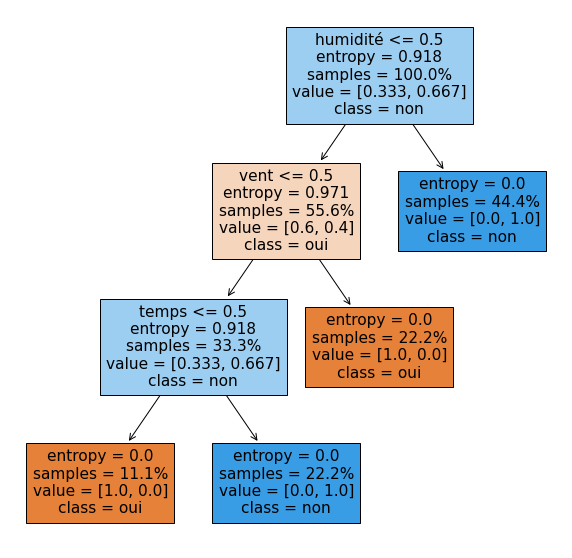

In [58]:
print("************* ENTROPY *********************")
tree_entropy = print_tree(dtc_entropy, list(x_test.columns),list(x_test.joueur_desc.unique()))

************* LOG LOSS *********************


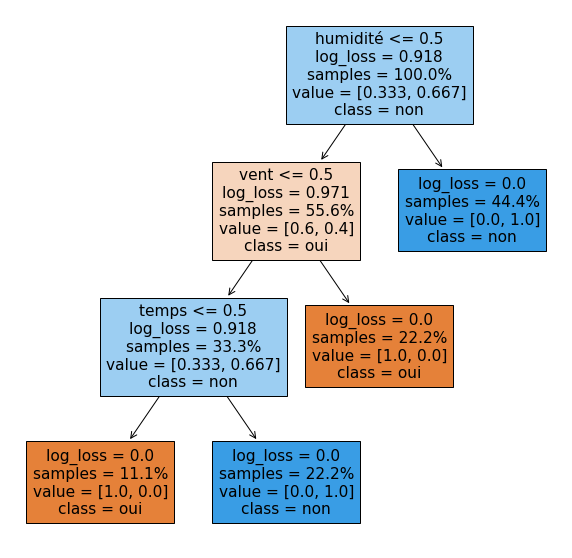

In [59]:
print("************* LOG LOSS *********************")
tree_log_loss = print_tree(dtc_log_loss, list(x_test.columns),list(x_test.joueur_desc.unique()))

************* GINI *********************


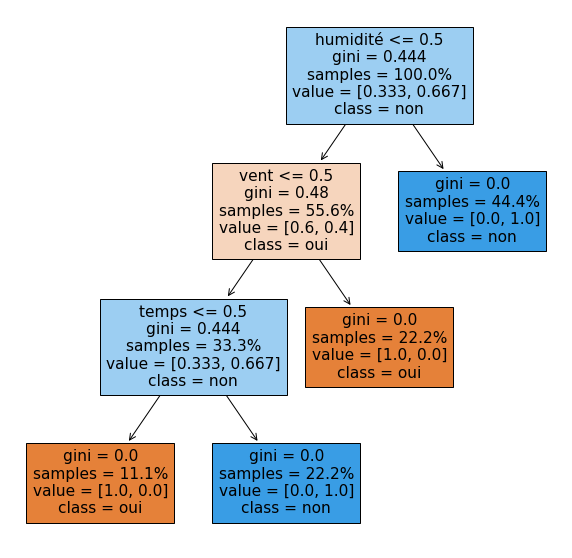

In [60]:
print("************* GINI *********************")
tree_gini = print_tree(dtc_gini, list(x_test.columns),list(x_test.joueur_desc.unique()))

Now let's create some predictions and check their results

In [61]:
predictions_entropy = get_predictions(dtc_entropy, x_test)
predictions_log_loss = get_predictions(dtc_log_loss, x_test)
predictions_gini = get_predictions(dtc_gini, x_test)

In [62]:
get_results(y_test, predictions_entropy)

Confusion matrix:
[[1 1]
 [1 2]]
Accuracy: 0.6
Precision: 0.6
Recall: 0.6
F1-score: 0.6


In [63]:
get_results(y_test, predictions_log_loss)

Confusion matrix:
[[1 1]
 [1 2]]
Accuracy: 0.6
Precision: 0.6
Recall: 0.6
F1-score: 0.6


In [64]:
get_results(y_test, predictions_gini)

Confusion matrix:
[[1 1]
 [1 2]]
Accuracy: 0.6
Precision: 0.6
Recall: 0.6
F1-score: 0.6
